# 1 - Introduction

**Phase 2 - Graded Challenge 7**

**Name**: Verren Monica

**Batch**: RMT-038

**Objectives**: Model inference untuk memprediksi gambar dari data inference yang diberikan menggunakan model yang telah dibuat pada notebook P2G7_verrenmonica.ipynb.


# 2 - Import Libraries

In [1]:
# Downgrade version of TensorFlow and tf-keras

!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

# 3 - Load Model

In [3]:
# Model loading
model = load_model('/content/modelPred.keras')

# 4 - Prediction Result

In [4]:
# Function to predict
def prediction(file):
  # Preprocessing: Resize image to target size (220x220) as required by the model
  img = tf.keras.utils.load_img(file, target_size=(220,220))

  # Preprocessing: Convert image to array and scale pixel values to [0, 1]
  x = tf.keras.utils.img_to_array(img)/255

  # Display image being predicted
  plt.imshow(img)

  # Preprocessing: Expand dimensions to add a batch dimension for model input
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  # Predict the probability of the input image belonging to each class
  y_pred_proba = model.predict(images)

  # Convert probability to binary class (0 or 1) using threshold of 0.5
  y_pred_class =  1 if y_pred_proba[0] >= 0.5 else 0

  # Map class index to class name
  class_name = ['Bike', 'Car']
  y_pred_class_name = class_name[y_pred_class]

  # Display the prediction result
  print('Prediction Result: {}'.format(y_pred_class_name))

--2025-01-06 16:31:48--  https://images.pexels.com/photos/170811/pexels-photo-170811.jpeg
Resolving images.pexels.com (images.pexels.com)... 104.18.66.220, 104.18.67.220, 2606:4700::6812:42dc, ...
Connecting to images.pexels.com (images.pexels.com)|104.18.66.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475919 (1.4M) [image/jpeg]
Saving to: ‘image_inference_1.jpg’

image_inference_1.j 100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2025-01-06 16:31:48 (21.2 MB/s) - ‘image_inference_1.jpg’ saved [1475919/1475919]

1/1 [==============================] - 0s 207ms/step
Prediction Result: Car


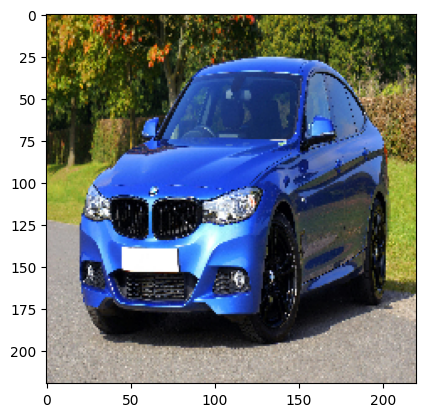

In [5]:
# Test a new image 1

# Download a car image
!wget --header="User-Agent: Mozilla/5.0" https://images.pexels.com/photos/170811/pexels-photo-170811.jpeg -O image_inference_1.jpg

# Predict Inference
prediction('image_inference_1.jpg')

# Deleting image after inference
!rm image_inference_1.jpg

--2025-01-06 16:31:50--  https://motorino.ca/wp-content/uploads/2020/09/KOLLTER-ES1-PRO-L-sm.jpg
Resolving motorino.ca (motorino.ca)... 172.67.201.34, 104.21.52.155, 2606:4700:3034::6815:349b, ...
Connecting to motorino.ca (motorino.ca)|172.67.201.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140851 (138K) [image/jpeg]
Saving to: ‘image_inference_2.jpg’

image_inference_2.j 100%[===================>] 137.55K  --.-KB/s    in 0.02s   

2025-01-06 16:31:50 (6.12 MB/s) - ‘image_inference_2.jpg’ saved [140851/140851]

1/1 [==============================] - 0s 66ms/step
Prediction Result: Bike


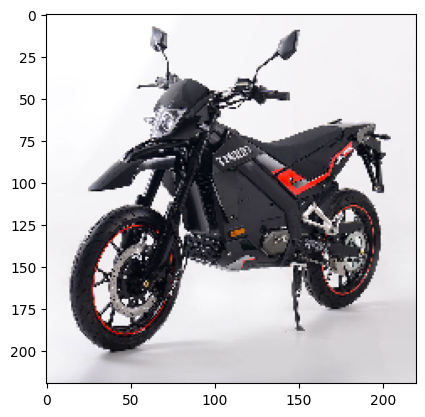

In [6]:
# Test a new image 2

# Download a bike image
!wget https://motorino.ca/wp-content/uploads/2020/09/KOLLTER-ES1-PRO-L-sm.jpg -O image_inference_2.jpg

# Predict Inference
prediction('image_inference_2.jpg')

# Deleting image after inference
!rm image_inference_2.jpg

Dari hasil prediksi data inference gambar mobil dan motor, model berhasil mengenali kedua object dengan benar.